<a href="https://colab.research.google.com/github/HV-ER30/Neopat/blob/master/Time_series_Analysis_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [91]:
maindf=pd.read_csv('/content/BRITANNIA.csv')

In [92]:
maindf.shape

(5305, 15)

In [93]:
maindf.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [94]:
maindf.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5300,2021-04-26,BRITANNIA,EQ,3650.30,3661.10,3662.00,3531.0,3546.0,3539.20,3558.62,1031406,3.670382e+14,72258.0,507276.0,0.4918
5301,2021-04-27,BRITANNIA,EQ,3539.20,3572.70,3574.60,3517.0,3546.0,3541.20,3539.42,813608,2.879697e+14,46189.0,322686.0,0.3966
5302,2021-04-28,BRITANNIA,EQ,3541.20,3488.00,3527.00,3469.0,3470.0,3478.75,3495.13,1498181,5.236339e+14,97170.0,763715.0,0.5098
5303,2021-04-29,BRITANNIA,EQ,3478.75,3496.75,3505.90,3447.0,3464.0,3468.90,3471.18,611087,2.121195e+14,41655.0,309653.0,0.5067
5304,2021-04-30,BRITANNIA,EQ,3468.90,3460.00,3468.35,3437.0,3444.8,3449.00,3450.52,436187,1.505071e+14,34606.0,208365.0,0.4777


In [95]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5305 non-null   object 
 1   Symbol              5305 non-null   object 
 2   Series              5305 non-null   object 
 3   Prev Close          5305 non-null   float64
 4   Open                5305 non-null   float64
 5   High                5305 non-null   float64
 6   Low                 5305 non-null   float64
 7   Last                5305 non-null   float64
 8   Close               5305 non-null   float64
 9   VWAP                5305 non-null   float64
 10  Volume              5305 non-null   int64  
 11  Turnover            5305 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4796 non-null   float64
 14  %Deliverble         4796 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.8

In [96]:
maindf.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5.305000e+03,5.305000e+03,2456.000000,4.796000e+03,4796.000000
mean,1687.974769,1690.173054,1713.527135,1665.679293,1688.601112,1688.492347,1689.630878,1.220883e+05,3.531071e+13,19243.627850,6.877725e+04,0.644524
std,1364.834888,1367.095820,1379.848544,1350.727532,1365.080043,1364.982005,1365.360931,2.668956e+05,9.119291e+13,22420.581857,1.340685e+05,0.179159
min,336.350000,340.000000,347.700000,295.200000,336.950000,336.350000,339.860000,8.400000e+01,9.614630e+09,27.000000,5.700000e+01,0.027900
25%,591.800000,594.500000,603.900000,580.200000,592.500000,591.800000,592.100000,4.284000e+03,3.694440e+11,4496.750000,3.040500e+03,0.518900
50%,1230.150000,1230.000000,1259.000000,1203.350000,1230.000000,1230.300000,1232.610000,2.002900e+04,1.347110e+12,13231.000000,1.913050e+04,0.651350
75%,2743.700000,2741.050000,2778.400000,2701.100000,2747.000000,2743.900000,2743.300000,1.347500e+05,3.634675e+13,24920.750000,8.919100e+04,0.777425
max,6900.150000,6918.000000,6934.350000,6831.700000,6898.000000,6900.150000,6886.460000,5.383773e+06,1.954734e+15,294264.000000,4.253015e+06,1.000000


In [97]:
# Checking for Null value
print('Null Values:',maindf.isnull().values.sum())

Null Values: 3867


In [98]:
# To drop the Null values
maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [99]:
maindf.shape

(2456, 15)

In [100]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2011-06-01
Ending Date 2021-04-30


In [101]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2014 = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] < '2014-12-31')]

y_2014.drop(y_2014[['Prev Close','Volume']],axis=1)

,Date,Symbol,Series,Open,High,Low,Last,Close,VWAP,Turnover,Trades,Deliverable Volume,%Deliverble
3671,2014-09-17,BRITANNIA,EQ,1470.0,1470.00,1411.0,1441.00,1453.15,1435.97,9.383502e+12,8626.0,31993.0,0.4896
3672,2014-09-18,BRITANNIA,EQ,1453.0,1471.80,1410.0,1413.00,1414.15,1432.13,1.679520e+13,15596.0,87104.0,0.7427
3673,2014-09-19,BRITANNIA,EQ,1432.9,1432.90,1352.2,1379.00,1375.20,1385.15,2.468279e+13,15271.0,128384.0,0.7205
3674,2014-09-22,BRITANNIA,EQ,1394.0,1395.95,1352.0,1362.10,1369.40,1372.49,1.101493e+13,11650.0,49916.0,0.6220
3675,2014-09-23,BRITANNIA,EQ,1376.0,1395.00,1354.0,1383.00,1386.35,1375.96,7.568309e+12,6492.0,32679.0,0.5941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,2014-12-23,BRITANNIA,EQ,1806.0,1820.00,1751.0,1771.00,1764.10,1788.36,1.363572e+13,6874.0,41727.0,0.5473
3734,2014-12-24,BRITANNIA,EQ,1766.0,1785.00,1746.3,1751.00,1755.40,1767.06,5.586385e+12,4238.0,17005.0,0.5379
3735,2014-12-26,BRITANNIA,EQ,1766.0,1769.15,1725.1,1734.50,1731.15,1741.75,7.226357e+12,4324.0,27060.0,0.6522
3736,2014-12-29,BRITANNIA,EQ,1742.0,1783.70,1735.0,1779.05,1780.20,1772.93,4.079471e+13,7306.0,189460.0,0.8234


In [102]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,1408.990000,1400.270000


In [103]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [104]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [105]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'], 
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [106]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2011-06-01')
                     & (maindf['Date'] <= '2021-04-30')]

y_overall.drop(y_overall[['Prev Close','Volume']],axis=1)

,Date,Symbol,Series,Open,High,Low,Last,Close,VWAP,Turnover,Trades,Deliverable Volume,%Deliverble
2849,2011-06-01,BRITANNIA,EQ,422.00,429.00,417.10,420.95,421.15,422.76,4.234168e+12,3553.0,40154.0,0.4009
2850,2011-06-02,BRITANNIA,EQ,416.90,436.30,414.40,435.00,431.90,427.90,5.811712e+12,3816.0,78060.0,0.5747
2851,2011-06-03,BRITANNIA,EQ,434.80,451.00,434.75,445.55,445.05,444.82,9.753129e+12,8911.0,70825.0,0.3230
2852,2011-06-06,BRITANNIA,EQ,447.25,452.00,433.15,448.05,447.65,445.76,4.018641e+12,3540.0,36602.0,0.4060
2853,2011-06-07,BRITANNIA,EQ,448.40,448.40,441.10,446.90,445.95,445.28,1.895502e+12,1688.0,25938.0,0.6093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,2021-04-26,BRITANNIA,EQ,3661.10,3662.00,3531.00,3546.00,3539.20,3558.62,3.670382e+14,72258.0,507276.0,0.4918
5301,2021-04-27,BRITANNIA,EQ,3572.70,3574.60,3517.00,3546.00,3541.20,3539.42,2.879697e+14,46189.0,322686.0,0.3966
5302,2021-04-28,BRITANNIA,EQ,3488.00,3527.00,3469.00,3470.00,3478.75,3495.13,5.236339e+14,97170.0,763715.0,0.5098
5303,2021-04-29,BRITANNIA,EQ,3496.75,3505.90,3447.00,3464.00,3468.90,3471.18,2.121195e+14,41655.0,309653.0,0.5067


In [107]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,2390.071560,2385.816972
February,2419.228788,2415.367929
March,2406.029512,2405.971707
April,2526.086053,2527.741842
May,2461.169171,2460.222021
June,2390.392417,2389.638152
July,2506.853636,2506.982273
August,2661.264734,2661.320773
September,2596.635714,2589.789901


In [108]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [109]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2456, 2)


In [110]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Britania close price 2011-2021', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [111]:
closedf = closedf[closedf['Date'] > '2020-04-30']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  250


In [112]:
closedf

,Date,Close
5055,2020-05-04,3092.95
5056,2020-05-05,2978.75
5057,2020-05-06,2987.70
5058,2020-05-07,2915.35
5059,2020-05-08,2994.65
...,...,...
5300,2021-04-26,3539.20
5301,2021-04-27,3541.20
5302,2021-04-28,3478.75
5303,2021-04-29,3468.90


In [113]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Britania close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [114]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(250, 1)


In [115]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (150, 1)
test_data:  (100, 1)


In [116]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [117]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (134, 15)
y_train:  (134,)
X_test:  (84, 15)
y_test (84,)


In [118]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (134, 15, 1)
X_test:  (84, 15, 1)


In [119]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [120]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 1s 68ms/step - loss: 0.4924 - val_loss: 0.3545
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.4795 - val_loss: 0.3443
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4680 - val_loss: 0.3365
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4591 - val_loss: 0.3297
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.4509 - val_loss: 0.3226
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4424 - val_loss: 0.3153
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4336 - val_loss: 0.3080
Epoch 8/200
5/5 [==============================] - 0s 13ms/step - loss: 0.4248 - val_loss: 0.3005
Epoch 9/200
5/5 [==============================] - 0s 11ms/step - loss: 0.4158 - val_loss: 0.2929
Epoch 10/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4068 - val_loss: 0.2852
Epoch 11/200
5/5 [=

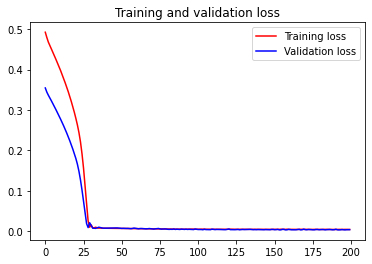

<Figure size 432x288 with 0 Axes>

In [121]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [122]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 4ms/step


((134, 1), (84, 1))

In [123]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [124]:
print("For Train data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print(" ")
print("For Test data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))

For Train data: 
RMSE:  69.86495991177178
MSE:  4881.112623473478
MAE:  51.98419098355878
 
For Test data: 
RMSE:  65.96245438557354
MSE:  4351.04538856887
MAE:  54.3245837983631


In [125]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8425372851539836
Test data explained variance regression score: 0.7410128325961676


In [126]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8418263010358161
Test data R2 score: 0.6814822566430844


In [127]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00036939708612506
Test data MGD:  0.00034132069232825765
----------------------------------------------------------------------
Train data MPD:  1.3415149294375297
Test data MPD:  1.2181207426145495


In [128]:

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


In [129]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [130]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [132]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [133]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [134]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns 
import matplotlib.pyplot as plt 

In [135]:
df = pd.read_csv('/content/BRITANNIA.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2010)].copy()
df.index = range(len(df))

In [136]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-01-04,BRITANNIA,EQ,1680.40,1669.00,1695.00,1661.05,1667.10,1668.55,1675.49,1869,3.131497e+11,NaN,1291.0,0.6907
1,2010-01-05,BRITANNIA,EQ,1668.55,1670.00,1694.20,1660.00,1665.20,1671.05,1676.57,2281,3.824251e+11,NaN,1442.0,0.6322
2,2010-01-06,BRITANNIA,EQ,1671.05,1685.00,1685.00,1645.00,1659.75,1655.85,1661.33,2150,3.571859e+11,NaN,1837.0,0.8544
3,2010-01-07,BRITANNIA,EQ,1655.85,1655.85,1665.00,1640.00,1641.50,1649.05,1640.27,82199,1.348282e+13,NaN,81814.0,0.9953
4,2010-01-08,BRITANNIA,EQ,1649.05,1641.00,1669.85,1641.00,1652.10,1652.70,1659.54,14514,2.408650e+12,NaN,13641.0,0.9399


In [137]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [138]:
df = df.fillna(method = 'ffill')

Text(0.5, 1.0, 'Britania Close Price')

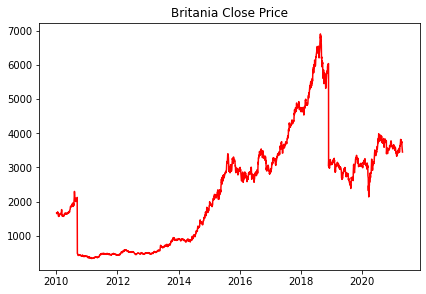

In [139]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Close'], color="red")
plt.title('Britania Close Price')

In [140]:
last1year_df = df[df['Date'] > '09-2020']

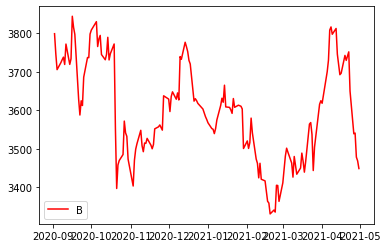

In [142]:
plt.subplot(1,1,1)
plt.plot(last1year_df['Date'], last1year_df['Close'], color="red")
plt.legend("Britania")

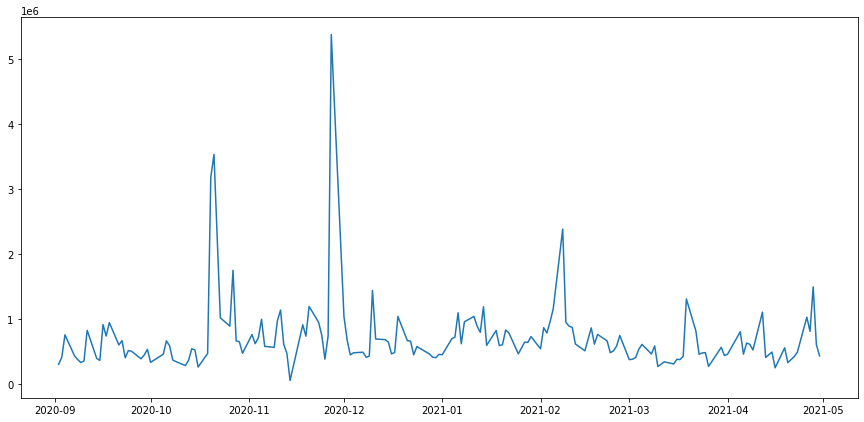

In [143]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_df['Date'] , last1year_df['Volume'])

In [144]:
last1month_df = df[df['Date'] > '2021-03-30']

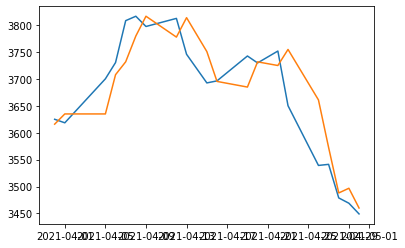

In [145]:
plt.subplot(1, 1, 1)
plt.plot(last1month_df['Date'], last1month_df['Close'])
plt.plot(last1month_df['Date'], last1month_df['Open'])

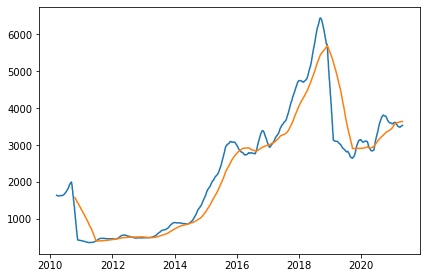

In [146]:
# Moving Average
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Close'].rolling(50).mean())
plt.plot(df['Date'], df['Close'].rolling(200).mean())

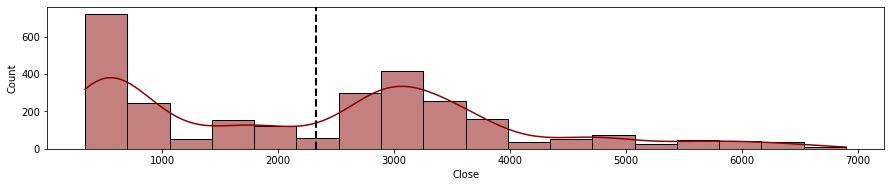

In [147]:
fig = plt.figure(figsize = (15,12))

fig.tight_layout()

plt.subplot(4, 1, 1)
sns.histplot(df['Close'],color='darkred', kde=True)
plt.axvline(df['Close'].mean(), color='k', linestyle='dashed', linewidth=2)

In [148]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2810, 2)


In [149]:
closedf = closedf[closedf['Date'] > '2020-04-30']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  250


In [150]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(250, 1)


In [151]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (175, 1)
test_data:  (75, 1)


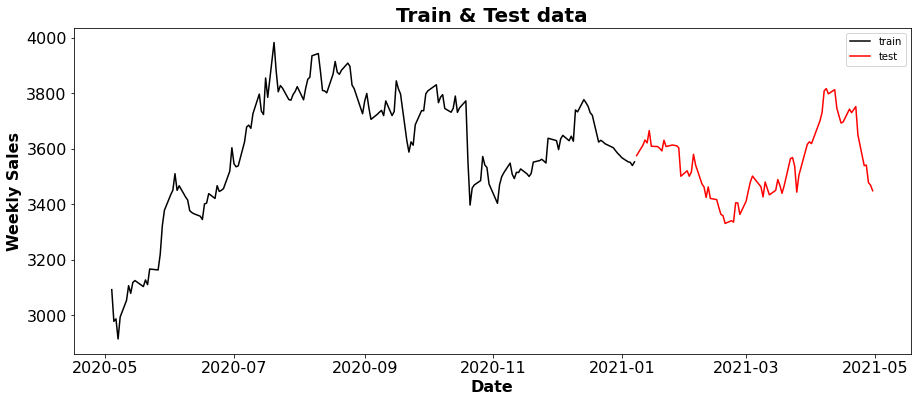

In [155]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['Date'][:175], y = close_stock['Close'][:175], color = 'black')
sns.lineplot(x = close_stock['Date'][175:], y = close_stock['Close'][175:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [156]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [157]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (159, 15)
y_train:  (159,)
X_test:  (59, 15)
y_test (59,)


In [158]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

[13:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [159]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.037497006653020505
Root Mean squared Error - RMSE : 0.04606889656389262


In [160]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (159, 1)
Test data prediction: (59, 1)


In [162]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [164]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'Value':'Close price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


In [165]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [166]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [167]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [168]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()